# LAB: Machine Learning Interpretability

Import necessary libraries

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import boto3

/opt/anaconda3/lib/python3.8/site-packages/pandas/_testing.py:24: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  import pandas._libs.testing as _testing


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import boto3

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


ImportError: cannot import name 'int' from 'numpy' (/opt/anaconda3/lib/python3.8/site-packages/numpy/__init__.py)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Load `Surgical-deepnet.csv` dataset

In [2]:
import os

DATASET = 'Surgical-deepnet.csv'
DATA_FOLDER = 's3://bah-data'

data = pd.read_csv(os.path.join(DATA_FOLDER, DATASET))

NameError: name 'pd' is not defined

In [57]:
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,hour,month,moonphase,mort30,mortality_rsi,complication
0,32.62,39.6,0,0,0,0,0,0,0,0,...,0.142512,0.004026,0.00,0,10.65,5,2,0,0.00,0
1,25.89,56.9,0,1,0,1,0,0,0,0,...,0.064935,0.004329,-0.26,3,7.80,6,2,0,-0.14,0
2,25.68,57.7,0,0,0,0,0,0,0,1,...,0.097476,0.007398,0.00,4,8.43,10,3,0,-1.00,0
3,31.66,38.6,0,1,2,1,0,0,0,0,...,0.197305,0.002764,0.00,1,7.93,6,3,0,0.52,1
4,29.82,74.9,1,0,1,1,0,0,0,0,...,0.312029,0.016673,-1.50,3,10.17,1,0,0,-0.71,1


Explore data, convert categorical columns (if there are some), clean missing data, prepare dataset

In [58]:
data.dropna(axis=1, inplace=True)

In [79]:
data.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,hour,month,moonphase,mort30,mortality_rsi,complication
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.360566,62.975680,0.62420,0.276200,1.010400,0.616000,0.004800,0.117800,0.194600,0.333200,...,0.133904,0.004456,-0.679660,1.615800,10.227470,5.86040,1.199600,0.003200,-0.821520,0.253000
std,8.301069,17.990916,0.54684,0.447162,1.814098,0.486407,0.069122,0.322403,0.395932,0.471405,...,0.088972,0.004619,1.347968,1.492996,2.695211,3.26831,1.155693,0.056484,1.198896,0.434774
min,2.150000,6.100000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016118,0.000000,-4.060000,0.000000,6.070000,0.00000,0.000000,0.000000,-3.820000,0.000000
25%,26.525000,51.600000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.081977,0.001962,-1.970000,0.000000,7.820000,3.00000,0.000000,0.000000,-2.250000,0.000000
50%,28.980000,59.600000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.105720,0.002959,-0.570000,1.000000,9.120000,7.00000,1.000000,0.000000,-0.600000,0.000000
75%,35.402500,74.500000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.183370,0.007398,0.000000,3.000000,12.155000,8.00000,2.000000,0.000000,0.000000,1.000000
max,92.590000,90.000000,2.00000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.466129,0.016673,12.560000,4.000000,18.920000,11.00000,3.000000,1.000000,4.080000,1.000000


Extract target column into separate variable

In [59]:
y = data['complication']
X = data.drop(['complication'], axis=1)

Fit Decision Tree classifier on whole dataset (X)

In [60]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X, y)

Plot decision tree using `graphviz` lib

In [61]:
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


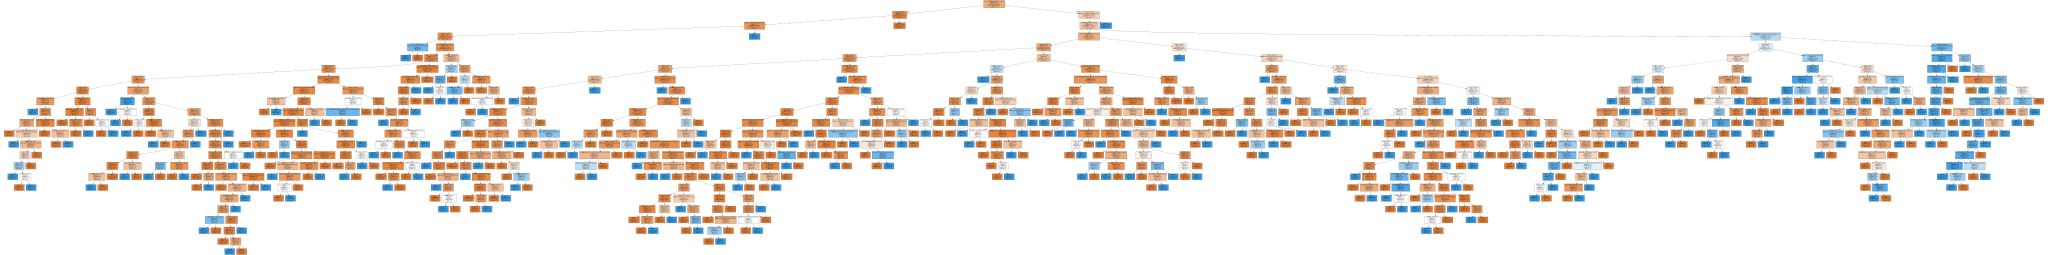

In [62]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file=None, 
                   feature_names=X.columns,  
                   class_names=['0', '1'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

Predict on the whole (train) dataset (X)

In [63]:
new_y = dtc.predict(X)

Normalize features before fitting Logistic Regression using MinMaxScaler

In [64]:
X

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,hour,month,moonphase,mort30,mortality_rsi
0,32.62,39.6,0,0,0,0,0,0,0,0,...,15,0.142512,0.004026,0.00,0,10.65,5,2,0,0.00
1,25.89,56.9,0,1,0,1,0,0,0,0,...,4,0.064935,0.004329,-0.26,3,7.80,6,2,0,-0.14
2,25.68,57.7,0,0,0,0,0,0,0,1,...,5,0.097476,0.007398,0.00,4,8.43,10,3,0,-1.00
3,31.66,38.6,0,1,2,1,0,0,0,0,...,11,0.197305,0.002764,0.00,1,7.93,6,3,0,0.52
4,29.82,74.9,1,0,1,1,0,0,0,0,...,1,0.312029,0.016673,-1.50,3,10.17,1,0,0,-0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,33.60,48.9,0,0,0,0,0,0,0,0,...,6,0.150706,0.001962,-0.17,2,9.58,8,1,0,0.62
4996,22.13,42.8,0,1,2,0,0,0,1,0,...,1,0.312029,0.016673,0.00,2,10.73,2,0,0,0.58
4997,22.81,55.2,1,1,0,0,0,0,1,0,...,11,0.197305,0.002764,-0.37,1,7.80,6,0,0,-1.14
4998,43.29,49.9,0,0,1,1,0,1,1,0,...,3,0.190355,0.012690,-1.03,2,7.28,0,0,0,0.35


In [65]:
from sklearn.preprocessing import MinMaxScaler

orginal_columns = X.columns
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
X = pd.DataFrame(rescaledX)
X.columns = orginal_columns
X

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,hour,month,moonphase,mort30,mortality_rsi
0,0.336908,0.399285,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.714286,0.280869,0.241450,0.244284,0.00,0.356420,0.454545,0.666667,0.0,0.483544
1,0.262494,0.605483,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.190476,0.108479,0.259637,0.228640,0.75,0.134630,0.545455,0.666667,0.0,0.465823
2,0.260172,0.615018,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.238095,0.180791,0.443688,0.244284,1.00,0.183658,0.909091,1.000000,0.0,0.356962
3,0.326294,0.387366,0.0,1.0,0.181818,1.0,0.0,0.0,0.0,0.0,...,0.523810,0.402627,0.165795,0.244284,0.25,0.144747,0.545455,1.000000,0.0,0.549367
4,0.305949,0.820024,0.5,0.0,0.090909,1.0,0.0,0.0,0.0,0.0,...,0.047619,0.657563,1.000000,0.154031,0.75,0.319066,0.090909,0.000000,0.0,0.393671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.347744,0.510131,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.299078,0.117692,0.234055,0.50,0.273152,0.727273,0.333333,0.0,0.562025
4996,0.220920,0.437426,0.0,1.0,0.181818,0.0,0.0,0.0,1.0,0.0,...,0.047619,0.657563,1.000000,0.244284,0.50,0.362646,0.181818,0.000000,0.0,0.556962
4997,0.228439,0.585221,0.5,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.523810,0.402627,0.165795,0.222022,0.25,0.134630,0.545455,0.000000,0.0,0.339241
4998,0.454887,0.522050,0.0,0.0,0.090909,1.0,0.0,1.0,1.0,0.0,...,0.142857,0.387184,0.761120,0.182310,0.50,0.094163,0.000000,0.000000,0.0,0.527848


Fit Logistic Regression model on original dataset (X) but labels are no longer `y` but `predicted_labels` from Decision Tree model.

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf = clf.fit(X, new_y)

Predict on the whole dataset (X) using Logistic regression model

In [67]:
y_pred = clf.predict(X)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Extract feature Importance

In [69]:
log_odds = clf.coef_[0]
pd.DataFrame(log_odds,
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
complication_rsi,3.764850
ccsComplicationRate,3.359848
mortality_rsi,2.372988
Age,1.092223
moonphase,0.290065
asa_status,0.210156
baseline_charlson,0.200818
baseline_cvd,0.200538
dow,0.188780
baseline_cancer,0.151833


Get some binary classification metrics on the results:
    - Accuracy
    - Precision
    - Recall
    - R2 score

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy: ", accuracy_score(y, y_pred))
print("Recall: ", recall_score(y, y_pred))
print("Precision macro: ", precision_score(y, y_pred, average='macro'))
print("Precision micro: ", precision_score(y, y_pred, average='micro'))
print("Precision weighted: ", precision_score(y, y_pred, average='weighted'))
print("R2 score: ", r2_score(y, y_pred))

Accuracy:  0.797
Recall:  0.3715415019762846
Precision macro:  0.7483523319546723
Precision micro:  0.797
Precision weighted:  0.781545630317092
R2 score:  -0.07412522289421197


Plot ROC curve

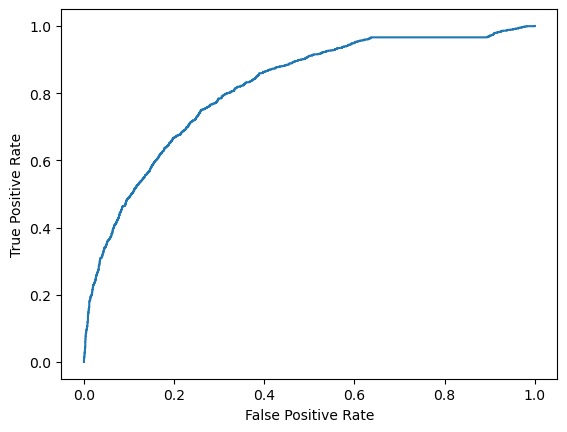

In [71]:
from sklearn.metrics import roc_curve

y_pred_proba = clf.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Get confusion matrix

<AxesSubplot: >

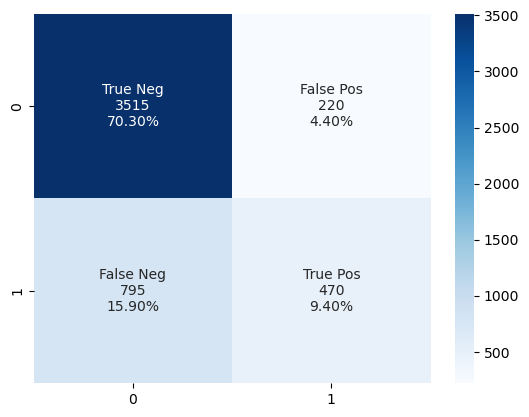

In [72]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Additional (bonus) analysis

Counterfactual analysis

In [73]:
! pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


Pick up 17 index point in our dataset (X)

In [74]:
data_point = 17
x_ref = X.iloc[data_point].values

print('True label:', y[data_point])
print('Predicted label:', clf.predict(x_ref.reshape(1, -1))[0])
print('Predicted probas:', clf.predict_proba(x_ref.reshape(1, -1)))
print('Predicted probability for label 0:', clf.predict_proba(x_ref.reshape(1, -1))[0][0])

True label: 0
Predicted label: 0
Predicted probas: [[0.93403678 0.06596322]]
Predicted probability for label 0: 0.934036780919133


We can see above, that there is a predicted score of `93.3%` probability for a class `0` membership. 

Now, we are going to push the prediction towards class `1` by setting `y_desired=1`

Moreover, we set the probability for class 1 to 100% `viay_desired_proba=1`

In [75]:
from mlxtend.evaluate import create_counterfactual


res = create_counterfactual(x_reference=x_ref, 
                            y_desired=1, 
                            model=clf, 
                            X_dataset=X.values,
                            y_desired_proba=1.,
                            lammbda=1,
                            random_seed=123)

In [76]:
for var in range(len(list(res))):
    print("Feature {}: {}".format(var+1, data.columns[var]))
    print("\tOriginal feature: {}".format(x_ref[var]))
    print("\tCounterfactual feature: {}".format(res[var]))
    print('')
print('Predictions for counterfactual:\n')
print('Predicted label:', clf.predict(res.reshape(1, -1))[0])
print('Predicted probas:', clf.predict_proba(res.reshape(1, -1)))

Feature 1: bmi
	Original feature: 0.29666076957098625
	Counterfactual feature: 0.3157894736842105

Feature 2: Age
	Original feature: 1.0
	Counterfactual feature: 0.31585220500595945

Feature 3: asa_status
	Original feature: 0.5
	Counterfactual feature: 0.0

Feature 4: baseline_cancer
	Original feature: 0.0
	Counterfactual feature: 0.0

Feature 5: baseline_charlson
	Original feature: 0.0
	Counterfactual feature: 0.0

Feature 6: baseline_cvd
	Original feature: 1.0
	Counterfactual feature: 1.0

Feature 7: baseline_dementia
	Original feature: 0.0
	Counterfactual feature: 0.0

Feature 8: baseline_diabetes
	Original feature: 0.0
	Counterfactual feature: 0.0

Feature 9: baseline_digestive
	Original feature: 0.0
	Counterfactual feature: 0.0

Feature 10: baseline_osteoart
	Original feature: 1.0
	Counterfactual feature: 0.0

Feature 11: baseline_psych
	Original feature: 0.0
	Counterfactual feature: 0.0

Feature 12: baseline_pulmonary
	Original feature: 0.0
	Counterfactual feature: 0.0

Feature 1

Using the feature changes, we can detect what features impacted the result (to push model decision towards specific class). In the above case, we can see that features such as `baseline_osteoart`, `ahrq_ccs` , `asa_status`, `complication_rsi` etc made the model push towards the class 1.

We should do some more of these observations to make such conclusions. This is only for the purpose of demo.